In [3]:
import numpy as np
#from numpy import *
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from scipy.spatial import distance
import copy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold,cross_val_predict
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [583]:
datas = pd.read_csv("dataSP1.csv",sep = ';')
X = datas[["Health","Clothing","Education","Recreational"]]
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
Gender_HH                           200 non-null object
Age_HH                              200 non-null int64
Civil_status_HH                     200 non-null object
Education_level_HH                  200 non-null object
Age_g                               200 non-null object
Employment_group_HH                 200 non-null object
Work_hours_HH                       200 non-null int64
Working_age_population              200 non-null int64
Economically_inactive_population    200 non-null int64
Economically_active_population      200 non-null int64
Earners                             200 non-null int64
Household_size                      200 non-null int64
Salary_HH                           200 non-null float64
Total_domestic_income               200 non-null float64
Per_capita_income                   200 non-null float64
Total_domestic_income_g             200 non-null object
Foo

# Homework 2

In [ ]:
#Kmeans method with Python

In [145]:
# Some variables

RANDOM_STATE = 42
NUM_CLUSTERS =9  
NUM_ITER = 20         
NUM_ATTEMPTS = 10     
data_sample = X

In [146]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=NUM_CLUSTERS, init='random', max_iter=500, n_init=1)#, verbose=1)
km.fit(data_sample)

print('Pre-clustering metrics')
print('----------------------')
print('Inertia:', km.inertia_)
print('Centroids:', km.cluster_centers_)

Pre-clustering metrics
----------------------
Inertia: 2030296.8888962455
Centroids: [[192.04833333  90.635       34.28        29.74333333]
 [ 25.43736842  47.38368421 119.60421053  36.19842105]
 [158.73333333 207.265      402.73666667 376.30166667]
 [110.636      229.954       78.542      196.609     ]
 [ 40.90542857  88.82314286  23.70542857  57.72457143]
 [ 50.86411765  96.33588235 245.95882353 103.86411765]
 [ 15.01719101  25.9847191    4.44011236  15.76651685]
 [663.7675     126.74       150.3125     112.655     ]
 [119.42375    148.38125    882.11875    163.85875   ]]


In [147]:


final_cents = []
final_inert = []
label=[]
    
for sample in range(NUM_ATTEMPTS):
    print('\nCentroid attempt: ', sample)
    km = KMeans(n_clusters=NUM_CLUSTERS, init='random', max_iter=500, n_init=1)#, verbose=1) 
    km.fit(data_sample)
    inertia_start = km.inertia_
    intertia_end = 0
    cents = km.cluster_centers_
        
    for iter in range(NUM_ITER):
        km = KMeans(n_clusters=NUM_CLUSTERS, init=cents, max_iter=500, n_init=1)
        km.fit(data_sample)
        print('Iteration: ', iter)
        print('Inertia:', km.inertia_)
        print('Centroids:', km.cluster_centers_)
        inertia_end = km.inertia_
        cents = km.cluster_centers_
        scores= km.labels_ 

    final_cents.append(cents)
    final_inert.append(inertia_end)
    label.append(scores)   





Centroid attempt:  0
Iteration:  0
Inertia: 2145599.7168977708
Centroids: [[130.37       211.27111111 311.08333333 360.93333333]
 [ 40.20472222  50.18722222  51.42055556  40.68722222]
 [215.18571429 214.69714286  50.59571429 112.83714286]
 [ 37.30736842 135.66684211  38.07578947  70.94578947]
 [ 43.66772727  84.55818182 230.46136364  91.17      ]
 [ 12.62682353  26.21094118   2.83035294  16.07823529]
 [663.7675     126.74       150.3125     112.655     ]
 [119.42375    148.38125    882.11875    163.85875   ]
 [160.975       71.326       25.261       23.45      ]]
Iteration:  1
Inertia: 2145599.7168977708
Centroids: [[130.37       211.27111111 311.08333333 360.93333333]
 [ 40.20472222  50.18722222  51.42055556  40.68722222]
 [215.18571429 214.69714286  50.59571429 112.83714286]
 [ 37.30736842 135.66684211  38.07578947  70.94578947]
 [ 43.66772727  84.55818182 230.46136364  91.17      ]
 [ 12.62682353  26.21094118   2.83035294  16.07823529]
 [663.7675     126.74       150.3125     112.6

Iteration:  16
Inertia: 2062550.559815756
Centroids: [[663.7675     126.74       150.3125     112.655     ]
 [ 24.828       46.2645     125.2905      35.7745    ]
 [144.55       207.88875    340.59375    363.88375   ]
 [119.42375    148.38125    882.11875    163.85875   ]
 [ 39.82314286  83.08514286  22.622       58.78314286]
 [ 85.90428571 263.42142857  43.57285714 140.36      ]
 [ 15.05090909  25.79613636   4.49056818  15.13602273]
 [191.99        93.79076923  35.87384615  39.94307692]
 [ 59.47705882 103.56058824 241.35117647 114.12588235]]
Iteration:  17
Inertia: 2062550.559815756
Centroids: [[663.7675     126.74       150.3125     112.655     ]
 [ 24.828       46.2645     125.2905      35.7745    ]
 [144.55       207.88875    340.59375    363.88375   ]
 [119.42375    148.38125    882.11875    163.85875   ]
 [ 39.82314286  83.08514286  22.622       58.78314286]
 [ 85.90428571 263.42142857  43.57285714 140.36      ]
 [ 15.05090909  25.79613636   4.49056818  15.13602273]
 [191.99     

Iteration:  12
Inertia: 1916208.727765285
Centroids: [[ 134.83818182  150.48909091  785.54090909  182.49454545]
 [  36.66333333   75.26142857  212.04666667   87.07285714]
 [ 451.514       139.532        38.334        65.886     ]
 [  37.35533333   69.35955556   43.75911111   52.14666667]
 [ 110.68111111  214.63666667  236.80555556  328.10111111]
 [ 160.03333333   80.38333333   33.9675       38.90333333]
 [  83.19125     245.7175       36.82375      91.22625   ]
 [1078.17        129.98        468.33        185.86      ]
 [  14.06909091   25.42556818    4.47159091   15.59011364]]
Iteration:  13
Inertia: 1916208.727765285
Centroids: [[ 134.83818182  150.48909091  785.54090909  182.49454545]
 [  36.66333333   75.26142857  212.04666667   87.07285714]
 [ 451.514       139.532        38.334        65.886     ]
 [  37.35533333   69.35955556   43.75911111   52.14666667]
 [ 110.68111111  214.63666667  236.80555556  328.10111111]
 [ 160.03333333   80.38333333   33.9675       38.90333333]
 [  83.1

Iteration:  17
Inertia: 2268305.750484472
Centroids: [[ 36.66333333  75.26142857 212.04666667  87.07285714]
 [191.99        93.79076923  35.87384615  39.94307692]
 [663.7675     126.74       150.3125     112.655     ]
 [ 31.0495      48.7605      37.4295      81.0335    ]
 [134.83818182 150.48909091 785.54090909 182.49454545]
 [ 39.75774194  78.72064516  40.34096774  31.05935484]
 [ 14.10590361  24.20578313   4.37951807  13.82253012]
 [ 83.19125    245.7175      36.82375     91.22625   ]
 [110.68111111 214.63666667 236.80555556 328.10111111]]
Iteration:  18
Inertia: 2268305.750484472
Centroids: [[ 36.66333333  75.26142857 212.04666667  87.07285714]
 [191.99        93.79076923  35.87384615  39.94307692]
 [663.7675     126.74       150.3125     112.655     ]
 [ 31.0495      48.7605      37.4295      81.0335    ]
 [134.83818182 150.48909091 785.54090909 182.49454545]
 [ 39.75774194  78.72064516  40.34096774  31.05935484]
 [ 14.10590361  24.20578313   4.37951807  13.82253012]
 [ 83.19125  

In [148]:
# Get best centroids to use for full clustering
best_cents = final_cents[final_inert.index(min(final_inert))]
pd.DataFrame(best_cents)


,0,1,2,3
0,134.838182,150.489091,785.540909,182.494545
1,36.663333,75.261429,212.046667,87.072857
2,451.514000,139.532000,38.334000,65.886000
3,37.355333,69.359556,43.759111,52.146667
4,110.681111,214.636667,236.805556,328.101111
5,160.033333,80.383333,33.967500,38.903333
6,83.191250,245.717500,36.823750,91.226250
7,1078.170000,129.980000,468.330000,185.860000
8,14.069091,25.425568,4.471591,15.590114


In [149]:
final_inert
#inert5=pd.DataFrame(final_inert)
#inert5
inert9=pd.DataFrame(final_inert)
inert9

,0
0,2.145600e+06
1,2.142497e+06
2,2.062551e+06
3,2.040858e+06
4,1.916273e+06
5,1.916209e+06
6,2.062551e+06
7,2.031042e+06
8,2.268306e+06
9,2.055717e+06


In [150]:
#labelsf5 = label[final_inert.index(min(final_inert))]
#labelsf5
labelsf9 = label[final_inert.index(min(final_inert))]
labelsf9

array([8, 6, 8, 3, 8, 8, 1, 8, 3, 3, 8, 8, 0, 8, 8, 5, 8, 8, 3, 5, 8, 8,
       8, 3, 1, 8, 6, 1, 8, 8, 8, 8, 4, 3, 8, 8, 4, 3, 1, 8, 8, 1, 5, 1,
       1, 3, 8, 8, 8, 8, 8, 6, 3, 1, 3, 8, 4, 0, 8, 3, 3, 1, 3, 8, 3, 8,
       4, 3, 6, 6, 0, 8, 3, 8, 8, 1, 3, 8, 3, 5, 3, 8, 1, 8, 3, 4, 5, 8,
       8, 6, 8, 1, 5, 8, 3, 8, 8, 0, 5, 3, 8, 8, 1, 8, 3, 7, 8, 3, 0, 8,
       2, 6, 2, 8, 8, 3, 8, 4, 3, 8, 8, 1, 8, 8, 8, 3, 0, 5, 3, 5, 8, 3,
       0, 3, 8, 4, 3, 8, 3, 8, 8, 4, 1, 3, 8, 1, 8, 8, 3, 0, 8, 2, 2, 3,
       8, 5, 3, 3, 8, 1, 3, 8, 1, 1, 1, 0, 2, 5, 8, 8, 3, 8, 8, 4, 5, 8,
       3, 8, 6, 3, 0, 8, 0, 8, 3, 8, 8, 8, 1, 8, 8, 3, 3, 8, 8, 8, 8, 8,
       8, 3])

In [155]:
l5=pd.DataFrame(labelsf9)
l5.to_excel('l5.xlsx')

In [34]:
#km_full = KMeans(n_clusters=NUM_CLUSTERS, init=best_cents, max_iter=100, verbose=1, n_init=1)
#km_full.fit(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3092004.413768093
start iteration
done sorting
end inner loop
Iteration 1, inertia 3090480.984946373
start iteration
done sorting
end inner loop
Iteration 2, inertia 3089226.1153437104
start iteration
done sorting
end inner loop
Iteration 3, inertia 3088001.6816444546
start iteration
done sorting
end inner loop
Iteration 4, inertia 3088001.6816444546
center shift 0.000000e+00 within tolerance 1.584039e+00


KMeans(algorithm='auto', copy_x=True,
    init=array([[  43.98268,  112.25512,  169.64341,  108.25415],
       [  25.83817,   39.50198,   12.60405,   24.17947],
       [ 273.33533,  159.55333,   52.394  ,  125.74133],
       [ 143.64417,  165.30917,  757.44083,  211.78667],
       [1078.17   ,  129.98   ,  468.33   ,  185.86   ]]),
    max_iter=100, n_clusters=5, n_init=1, n_jobs=None,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=1)

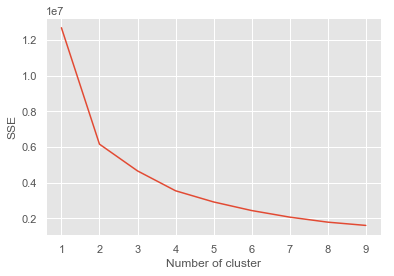

In [103]:
#Elbow curve
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

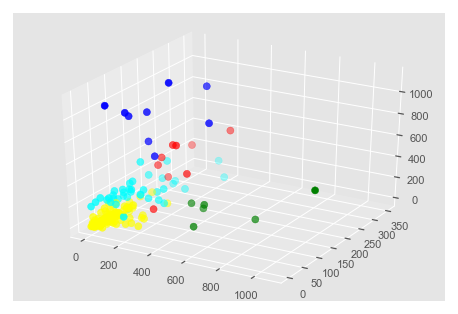

In [156]:
X1=np.array(X)
labels=labelsf5
colores=['red','green','blue','cyan','yellow','orange','black','purple','g']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=asignar,s=50)


My kmeans

In [ ]:
#Kmeans Algorithm
#X dataset
#k number of clusters
def kmean(X,k):
    #Chose  random centroids
    id = np.random.randint(0, X.shape[0], size=k)
    C=X[id,:]
    
    # Store centrois
    C_old = np.zeros(C.shape)
    clusters = np.zeros(X.shape[0])
    #Inicialize loop
    error = np.linalg.norm(C- C_old)
    
    while error != 0:
        
        for i in range(len(X)):
            distances = np.linalg.norm(X[i]-C,axis=1)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            
        C_old = copy.deepcopy(C)
    
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]         
            C[i] = np.mean(points, axis=0)
    
        error = np.linalg.norm(C- C_old)
    
    return clusters, C


In [ ]:
#For Kmeans criterion
def crit(X,C,cluster,k):
    criterio=0
    for i in range(len(X)):
        labels=cluster.astype(np.int64)
        j=labels[i]
        criterio=criterio+np.linalg.norm(X[i]-C[j,:])**2
        
    return criterio

Part 2

In [248]:
boot1=datas["Recreational"]
boot2=datas.loc[datas['K5'] == 4]["Recreational"]
boot3=datas.loc[datas['K5'] == 3]["Recreational"]

m=5000
Mean_feature=np.zeros(m)
Mean_cluster=np.zeros(m)
Mean_cluster2=np.zeros(m)
for i in range(m):
    b1 = np.random.choice(boot1, size=len(boot1), replace=True)
    b2=np.random.choice(boot2, size=len(boot2), replace=True)
    b3=np.random.choice(boot3, size=len(boot3), replace=True)
    Mean_feature[i]=np.mean(b1)
    Mean_cluster[i]=np.mean(b2)
    Mean_cluster2[i]=np.mean(b3)




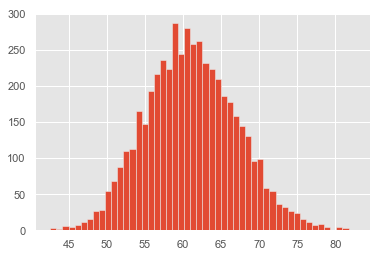

mean_feature= 61.096749999999986
Bootstrap pivotal= [ 49.34577564949136 , 72.80515103050863 ]
Bootstrap non-pivotal= [ 50.02773375000001 , 73.4717775 ]


In [231]:
plt.hist(Mean_feature, bins=50)
plt.show()

meanf=np.mean(Mean_feature)
stdf=np.std(Mean_feature)

p1=np.percentile(Mean_feature, 2.5)
p2=np.percentile(Mean_feature, 97.5)

print("mean_feature=",np.mean(boot1))
print("Bootstrap pivotal=","[",meanf-1.96*stdf,",",meanf+1.96*stdf,"]")
print("Bootstrap non-pivotal=","[",p1,",",p2,"]")

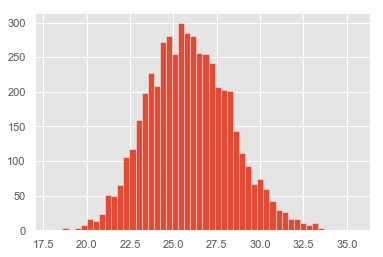

mean_cluster= 25.883722627737228
Bootstrap pivotal= [ 21.184704778821185 , 30.616256097091224 ]
Bootstrap non-pivotal= [ 21.442417883211682 , 30.872222627737223 ]


In [233]:
plt.hist(Mean_cluster, bins=50)
plt.show()

meanc=np.mean(Mean_cluster)
stdc=np.std(Mean_cluster)

p1c=np.percentile(Mean_cluster, 2.5)
p2c=np.percentile(Mean_cluster, 97.5)

print("mean_cluster=",np.mean(boot2))
print("Bootstrap pivotal=","[",meanc-1.96*stdc,",",meanc+1.96*stdc,"]")
print("Bootstrap non-pivotal=","[",p1c,",",p2c,"]")

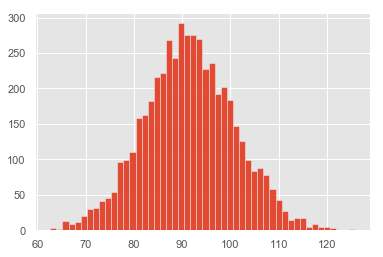

mean_cluster= 91.60307692307693
Bootstrap pivotal= [ 73.10194735086769 , 109.85669982861948 ]
Bootstrap non-pivotal= [ 72.88435256410256 , 109.99938461538461 ]


In [251]:
plt.hist(Mean_cluster2, bins=50)
plt.show()

meanc1=np.mean(Mean_cluster2)
stdc1=np.std(Mean_cluster2)

p1c1=np.percentile(Mean_cluster2, 2.5)
p2c1=np.percentile(Mean_cluster2, 97.5)

print("mean_cluster=",np.mean(boot3))
print("Bootstrap pivotal=","[",meanc1-1.96*stdc1,",",meanc1+1.96*stdc1,"]")
print("Bootstrap non-pivotal=","[",p1c1,",",p2c1,"]")

mean_dif= 35.14661222817518
Bootstrap pivotal= [ 22.44030787061324 , 47.85291658573712 ]
Bootstrap non-pivotal= [ 22.8764145620438 , 48.762054735401435 ]


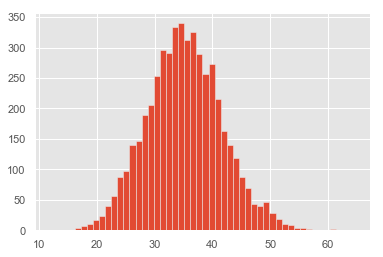

In [258]:
dif=Mean_feature-Mean_cluster
plt.hist(dif, bins=50)
plt.show

meand=np.mean(dif)
stdd=np.std(dif)

p1d=np.percentile(dif, 2.5)
p2d=np.percentile(dif, 97.5)

print("mean_dif=",np.mean(dif))
print("Bootstrap pivotal=","[",meand-1.96*stdd,",",meand+1.96*stdd,"]")
print("Bootstrap non-pivotal=","[",p1d,",",p2d,"]")

mean_dif= -30.430853609743586
Bootstrap pivotal= [ -52.307345832098626 , -8.554361387388546 ]
Bootstrap non-pivotal= [ -51.99195631410258 , -8.15470323717951 ]


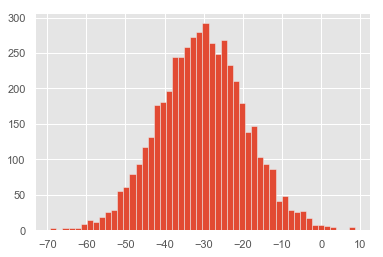

In [259]:
dif=Mean_feature-Mean_cluster2
plt.hist(dif, bins=50)
plt.show

meand=np.mean(dif)
stdd=np.std(dif)

p1d=np.percentile(dif, 2.5)
p2d=np.percentile(dif, 97.5)

print("mean_dif=",np.mean(dif))
print("Bootstrap pivotal=","[",meand-1.96*stdd,",",meand+1.96*stdd,"]")
print("Bootstrap non-pivotal=","[",p1d,",",p2d,"]")

mean_dif= -65.57746583791875
Bootstrap pivotal= [ -84.5590652388001 , -46.5958664370374 ]
Bootstrap non-pivotal= [ -84.64086215609208 , -46.42636131386861 ]


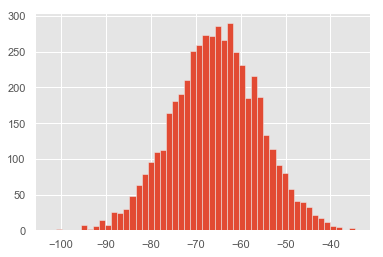

In [260]:
dif=Mean_cluster-Mean_cluster2
plt.hist(dif, bins=50)
plt.show

meand=np.mean(dif)
stdd=np.std(dif)

p1d=np.percentile(dif, 2.5)
p2d=np.percentile(dif, 97.5)

print("mean_dif=",np.mean(dif))
print("Bootstrap pivotal=","[",meand-1.96*stdd,",",meand+1.96*stdd,"]")
print("Bootstrap non-pivotal=","[",p1d,",",p2d,"]")

# Homework 3

In [277]:
XC= datas[["Civil_status_HH","Gender_HH","Education_level_HH"]]
XC.head()

,Civil_status_HH,Gender_HH,Education_level_HH
0,Single,Male,Secondary
1,Free union,Male,University
2,Single,Female,Secondary
3,Married,Male,University
4,Free union,Male,Primary


In [477]:
C1=np.array(pd.crosstab(XC.Gender_HH, XC.Civil_status_HH))
pd.crosstab(XC.Gender_HH, XC.Civil_status_HH)

Civil_status_HH,Divorced,Free union,Married,Separated,Single,Widower
Gender_HH,,,,,,
Female,9,4,2,17,10,2
Male,2,40,102,2,8,2


In [479]:
C2=np.array(pd.crosstab(XC.Gender_HH, XC.Education_level_HH))
pd.crosstab(XC.Gender_HH, XC.Education_level_HH)


Education_level_HH,No education,Primary,Secondary,University
Gender_HH,,,,
Female,1,15,18,10
Male,1,43,60,52


In [475]:
def conting(X):
    
    n=X.shape[0]
    T=X/X.sum(axis=0)
    C=np.zeros((X.shape[0],X.shape[1]))
    D=np.zeros((X.shape[0],X.shape[1]))
    for i in range(n):
        C[i,:]=X.sum(axis=0)*(X[i,:].sum()/X.sum())
    
    D=(X-C)**2/C
    chi=D.sum()
    return chi,T
        

In [488]:
chi,T=conting(C2)

print(chi)
print(T)

2.715965760374078
[[0.5    0.2586 0.2308 0.1613]
 [0.5    0.7414 0.7692 0.8387]]


In [467]:
def quetelet(X):
    n=X.shape[0]
    
    Q=np.zeros((X.shape[0],X.shape[1]))
    D=np.zeros((X.shape[0],X.shape[1]))
    C=X/X.sum()
    for i in range(n):
        D[i,:]=(C[i,:])/C[i].sum()
        Q[i,:]=100*(D[i,:]-C.sum(axis=0))/C.sum(axis=0)
    
    quetelet=np.sum(C*Q)
    return C,Q,quetelet
        
        


In [489]:
C,Q,q=quetelet(C2)
pd.DataFrame(Q)

#print(Q)
print(q)

1.3579828801870353


# Homework 4

In [497]:
XP= datas[["Health","Education","Recreational"]]
XP.head()

,Health,Education,Recreational
0,15.00,0.00,10.67
1,128.80,0.00,198.11
2,6.67,0.00,1.00
3,24.71,97.66,50.05
4,0.00,0.00,0.00


In [609]:
datas.Gender_HH = pd.Categorical(datas.Gender_HH)
datas['Gender_HH_cc'] = datas.Gender_HH.cat.codes

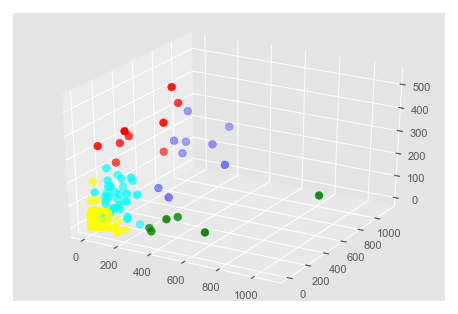

In [619]:
XP=np.array(XP)



# Predicting the clusters
labels = np.array(datas.K5)
# Getting the cluster centers
colores=['red','green','blue','cyan','yellow']#,'black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(XP[:, 0], XP[:, 1], XP[:, 2], c=asignar,s=60)


In [626]:
#Standarized data
XP_std=(XP-XP.mean(axis=0))/XP.std(axis=0)
XP_range=(XP-XP.mean(axis=0))/(XP.max(axis=0)-XP.min(axis=0))


Text(0.5,0,'Recreational')

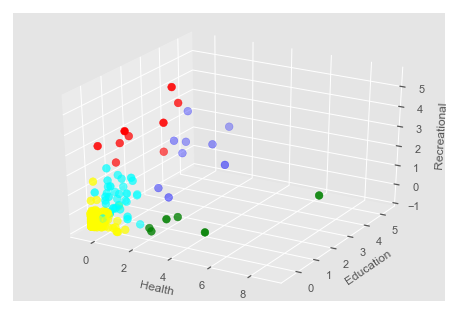

In [627]:
fig1 = plt.figure()
ax = Axes3D(fig1)
ax.scatter(XP_std[:, 0], XP_std[:, 1], XP_std[:, 2], c=asignar,s=60)
ax.set_xlabel('Health')
ax.set_ylabel('Education')
ax.set_zlabel('Recreational')


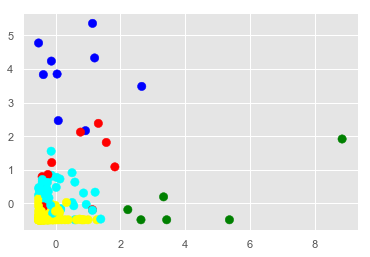

In [622]:
# Getting the values and plotting it

plt.scatter(XP_std[:,0], XP_std[:,1], c=asignar, s=70)
plt.show()

Text(0.5,0,'Recreational')

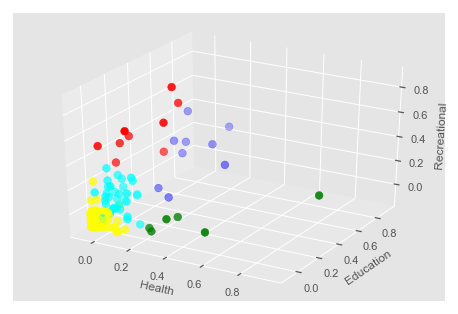

In [623]:
fig2 = plt.figure()
ax = Axes3D(fig2)
ax.scatter(XP_range[:,0], XP_range[:, 1], XP_range[:, 2], c=asignar,s=60)
ax.set_xlabel('Health')
ax.set_ylabel('Education')
ax.set_zlabel('Recreational')


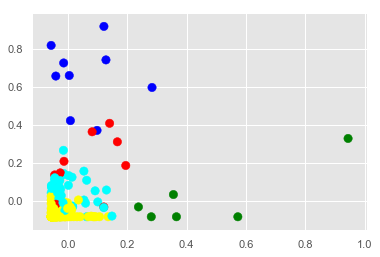

In [625]:
# Getting the values and plotting it

plt.scatter(XP_range[:,0], XP_range[:,1], c=asignar, s=70)
plt.show()

In [661]:
from numpy.linalg import svd

U, s, V = np.linalg.svd(XP_std)

data_sct=0
for i in range(len(s)):
    data_sct=data_sct+s[i]**2
    
print(data_sct)
print(s)
V

600.0000000000003
[18.7406 12.5313  9.5789]


array([[ 0.4735,  0.6133,  0.6322],
       [ 0.8758, -0.4041, -0.2639],
       [-0.0936, -0.6786,  0.7285]])

In [685]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(XP_std)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, datas[['K5']]], axis = 1)
pd.DataFrame(pca.components_)

,0,1,2
0,0.473520,0.613274,0.632198
1,0.875791,-0.404146,-0.263924


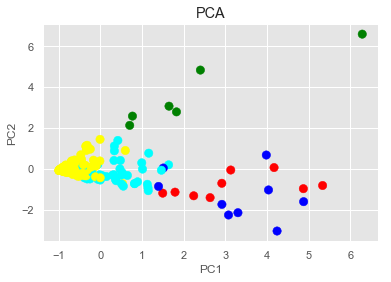

In [665]:


finalDf=np.array(finalDf)
plt.scatter(finalDf[:,0], finalDf[:,1], c=asignar, s=70)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.title("PCA")
plt.show()

In [686]:

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(XP_range)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, datas[['K5']]], axis = 1)
pd.DataFrame(pca.components_)

,0,1,2
0,0.213340,0.725026,0.654846
1,0.248061,-0.688511,0.681483


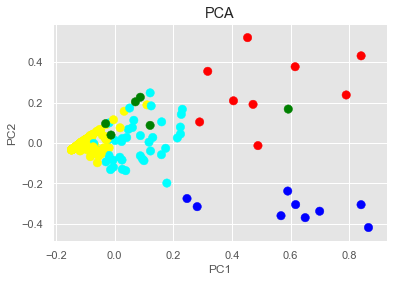

In [667]:
finalDf=np.array(finalDf)
plt.scatter(finalDf[:,0], finalDf[:,1], c=asignar, s=70)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.title("PCA")
plt.show()

# Homework 5

In [689]:
X5=datas[["Total_domestic_income","Total_domestic_outcome","Food","Clothing","Housing","Health",
          "Transportation and Communication","Recreational","Education","Others"]]



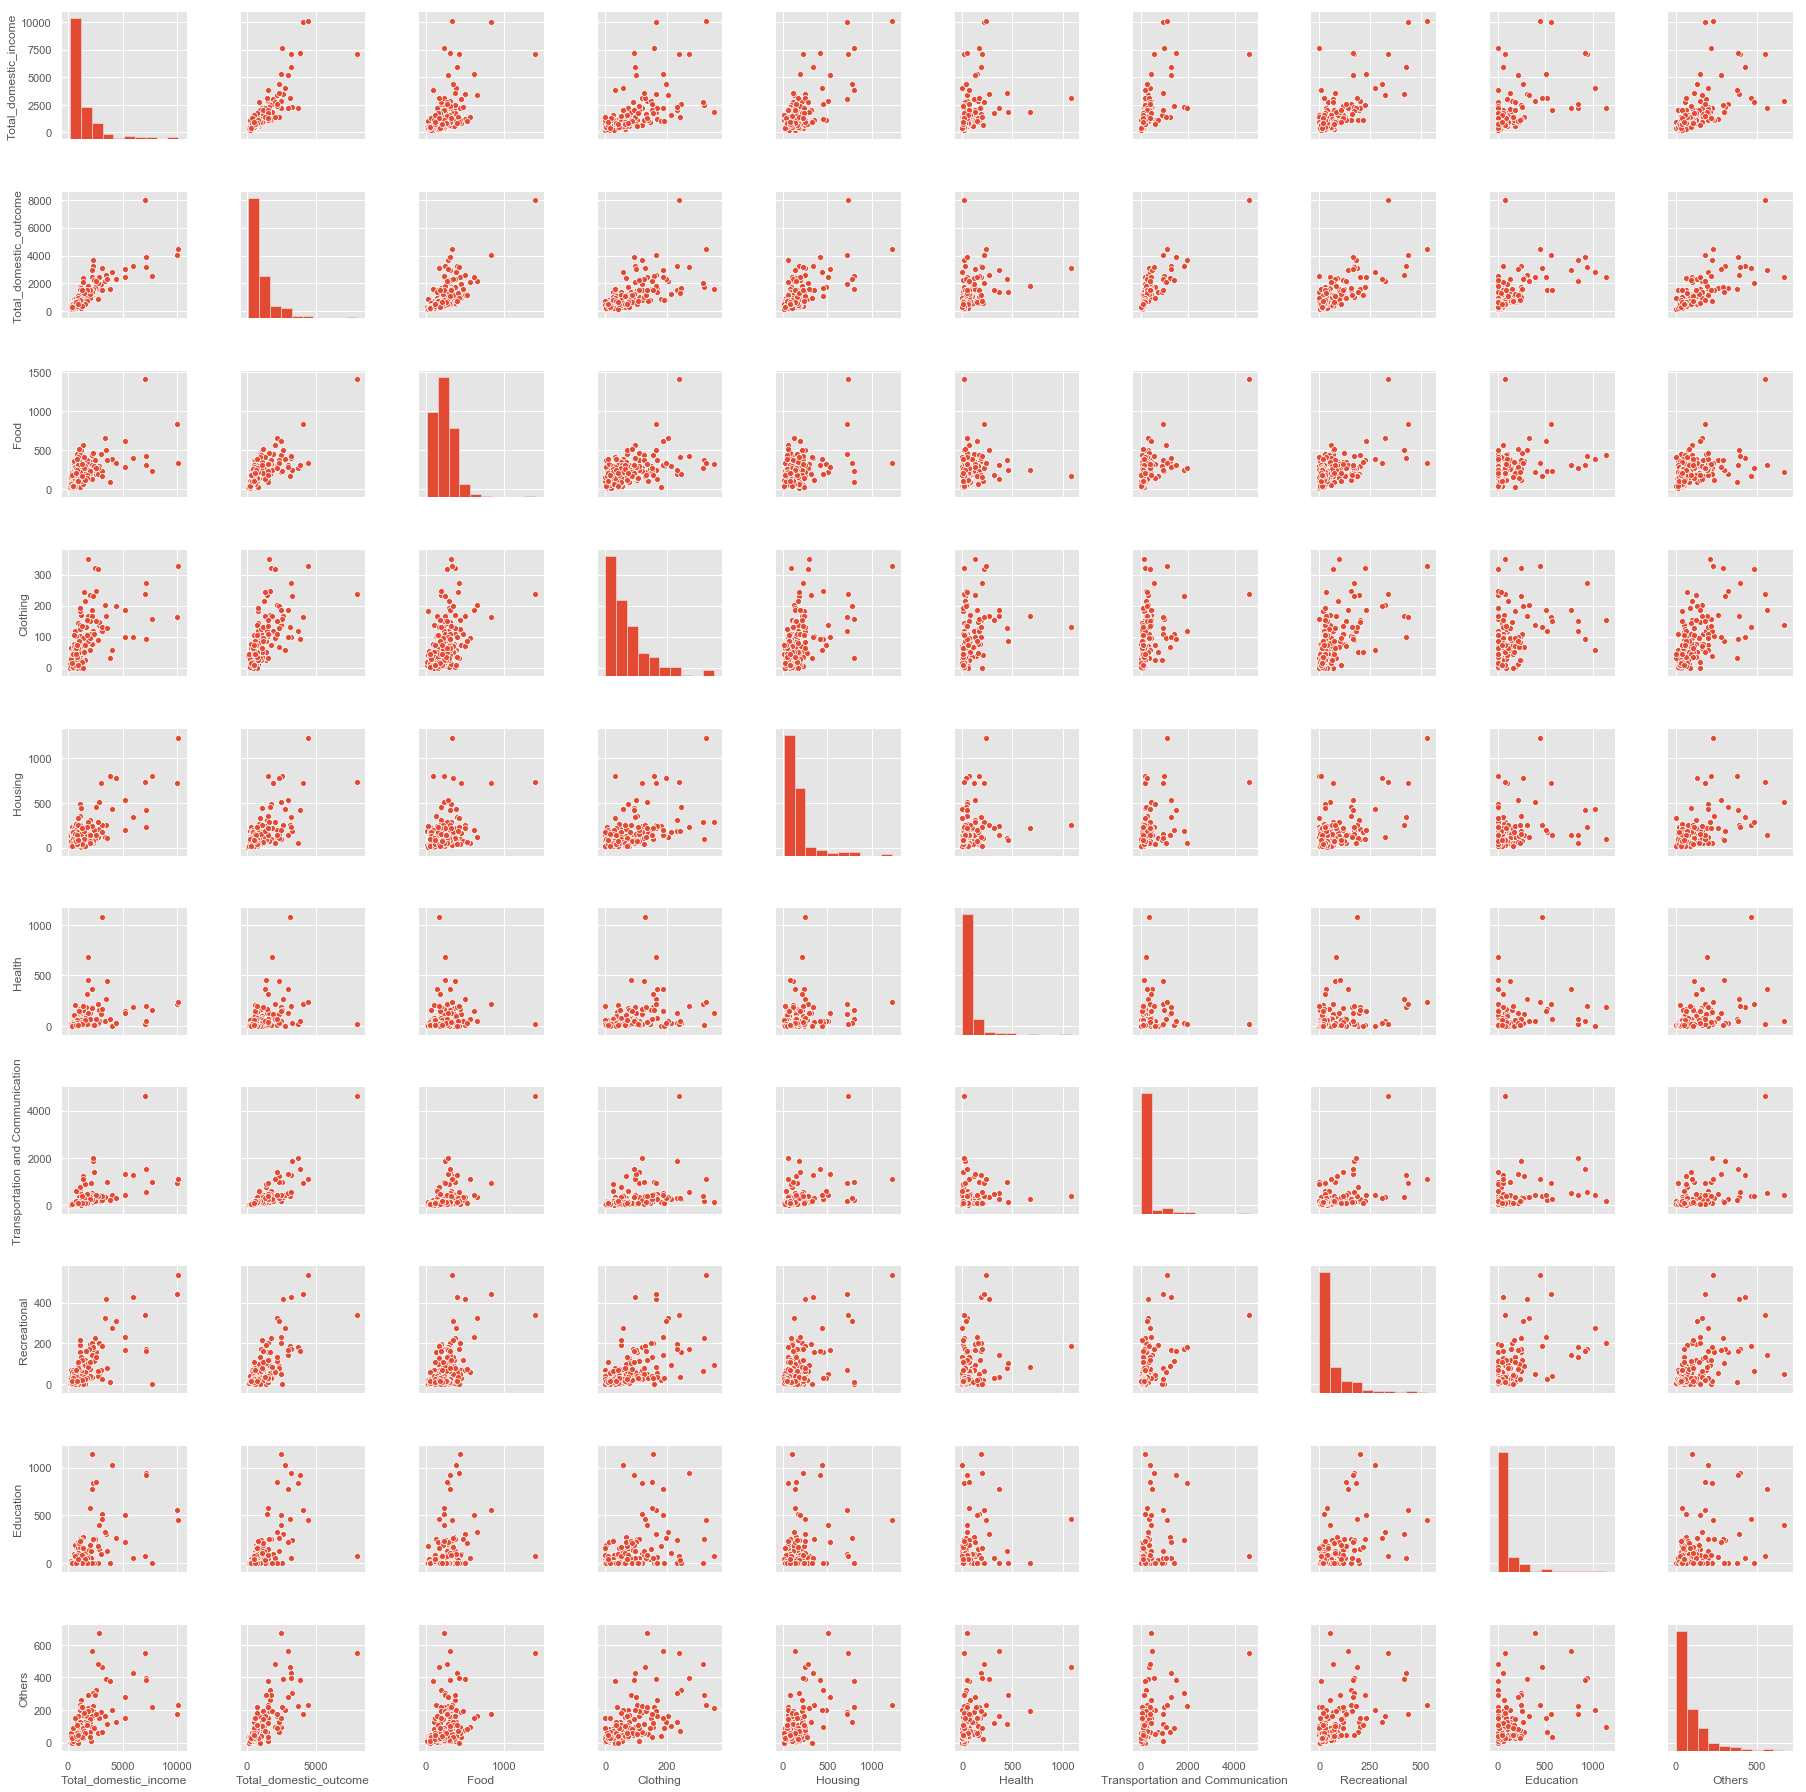

In [690]:
sns.pairplot(X5)

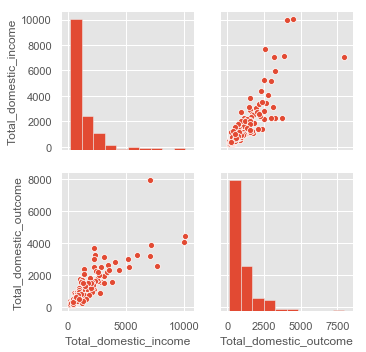

In [692]:
Xl=datas[["Total_domestic_income","Total_domestic_outcome"]]
sns.pairplot(Xl)

In [811]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

X=datas[["Total_domestic_income"]]
y=datas[["Total_domestic_outcome"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

regression_model = linear_model.LinearRegression(fit_intercept=False)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)




m=regression_model.coef_[0]
b=regression_model.intercept_
r=regression_model.score(y_test, y_pred)
print("slope=",m, "intercept=",b,"r^2=",r,"correlation",r**(1/2))



slope= [0.5873] intercept= 0.0 r^2= 0.6264850684878058 correlation 0.7915080975503699


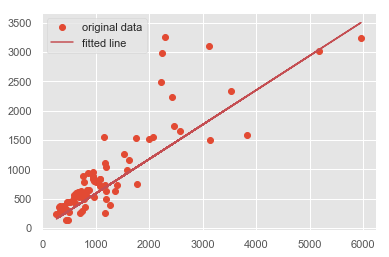

In [812]:
plt.plot(X_test, y_test, 'o', label='original data')
plt.plot(X_test, b + m*X_test, 'r', label='fitted line')
#plt.plot(X_test,y_pred, color='blue', linewidth=3)
plt.legend()
plt.show()

In [805]:
regression_model.predict([[500]])

array([[561.4809]])

In [806]:
regression_model.predict([[1000]])

array([[812.2343]])

In [814]:
regression_model.predict([[2000]])

array([[1174.6265]])

In [813]:
mean_absolute_error(y_pred, y_test)

279.0310358524844